In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("/home/saumya/Documents/Spec_data/FINAL/Model_data/ICM")

In [3]:
pred = np.load('pred_vals_icm.npy')

In [4]:
pred

array([[7.14352814e+02, 5.90342904e-01, 4.39820394e+01],
       [6.15935382e+02, 7.52805863e-01, 2.63413627e+01],
       [4.63654640e+02, 6.16267115e-01, 1.29180016e+01],
       ...,
       [7.53401486e+02, 1.03962710e+00, 4.50653404e+01],
       [3.17843690e+02, 5.72690283e-01, 3.62075398e+01],
       [3.07917131e+02, 5.35628676e-01, 2.44486177e+01]])

In [5]:
true = np.load('true_vals_icm.npy')

In [6]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [7]:
x = np.linspace(0, 55, 1000)

In [8]:
Pred_pro = bolts(pred[:, 0], pred[:, 1], x, pred[:, 2])

/tmp/ipykernel_5538/4250135426.py:5: RuntimeWarning: overflow encountered in exp
  b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))


In [9]:
True_pro = bolts(true[:, 0], true[:, 1], x, pred[:, 2])

In [10]:
true[:, 0]

array([714.25      , 616.33333333, 459.66666667, ..., 753.41666667,
       322.58333333, 303.        ])

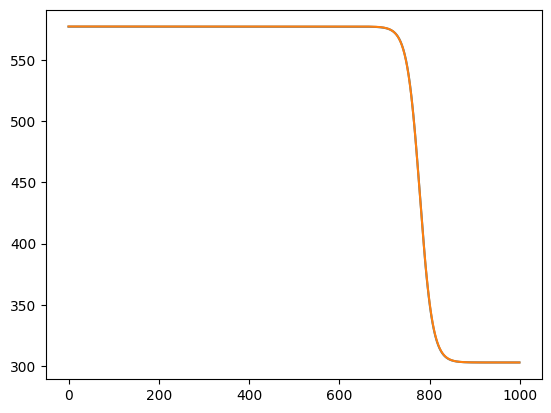

In [11]:
plt.plot(Pred_pro[100])
plt.plot(True_pro[100])

In [12]:
error_def = True_pro-Pred_pro

In [13]:
rms = []
for i in error_def:
    rms.append(np.sqrt(np.mean(i**2)))
rms = np.array(rms)

In [14]:
rms.shape

(1250,)

In [15]:
max(rms)

464.5813528468211

In [16]:
min(rms)

0.015840224199103338

In [17]:
np.sqrt(np.mean(rms**2))

36.98484410669678

In [18]:
#checking models now
import pickle

In [19]:
with open('gpr_ICM_Norm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [20]:
test_exp = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/test_hpu.npy')

In [37]:
test_exp_0 = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/Exp_test.npy')
test_exp_0 = test_exp_0/2

In [38]:
max(test_exp_0)

0.15020560322540732

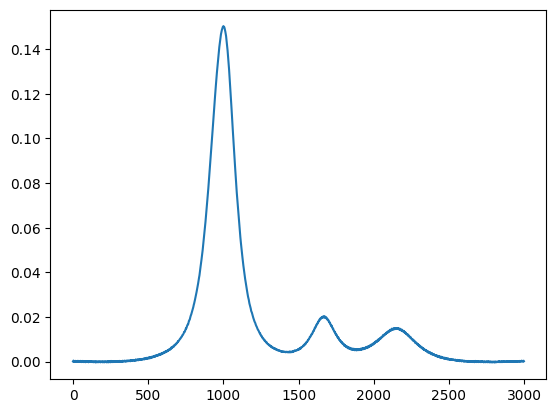

In [39]:
plt.plot(test_exp_0)

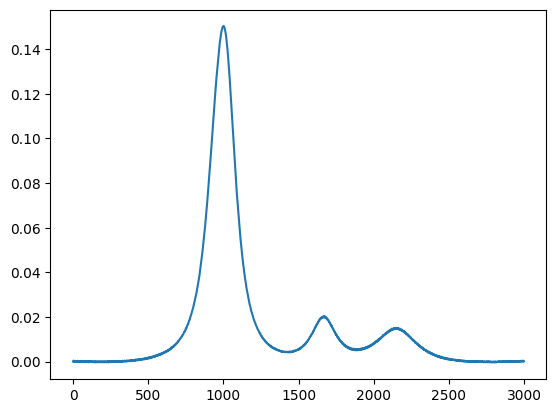

In [40]:
plt.plot(test_exp[0])

In [24]:
test_exp[0] = test_exp_0

In [25]:
# test_exp = test_exp/100

In [26]:
newX = test_exp

newX = np.concatenate((newX,np.zeros((np.shape(test_exp)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys_norm,var=loaded_model.predict(newX,Y_metadata=noise_dict)

In [27]:
ys_norm

array([[ 5.30745764e-05,  1.11437287e-03,  2.75665375e-04],
       [ 3.15216794e+00, -1.21233389e+02, -1.69378522e+01],
       [-8.98206419e+00, -1.41621996e+02, -1.72274922e+01],
       ...,
       [ 1.41877615e+01, -8.29583517e+01,  5.47375252e-01],
       [-1.90377988e+01, -1.41795904e+02,  1.37354789e+01],
       [ 8.86016517e+00, -8.32541136e+01, -4.76081081e+00]])

In [28]:
with open('ICM_A1.pkl', 'rb') as file:
    y_A1_T = pickle.load(file)


with open('ICM_A2.pkl', 'rb') as file:
    y_A2_T = pickle.load(file)

with open('ICM_A3.pkl', 'rb') as file:
    y_A3_T = pickle.load(file)    
    

 /home/saumya/miniconda3/envs/tf/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning:Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [29]:
temp = y_A1_T.inverse_transform(ys_norm[:,0].reshape(-1,1)).ravel()
A2 = y_A2_T.inverse_transform(ys_norm[:,1].reshape(-1,1)).ravel()
A3 = y_A3_T.inverse_transform(ys_norm[:,2].reshape(-1,1)).ravel()

In [30]:
temp[0], A2[0], A3[0]

(538.0074950550044, 0.5503545912773873, 28.0043840187762)

In [31]:
np.zeros((np.shape(test_exp)[0],1)).shape

(2500, 1)

In [32]:
np.shape(test_exp)[0]

2500

In [33]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [34]:
x = np.linspace(0, 55, 1000)


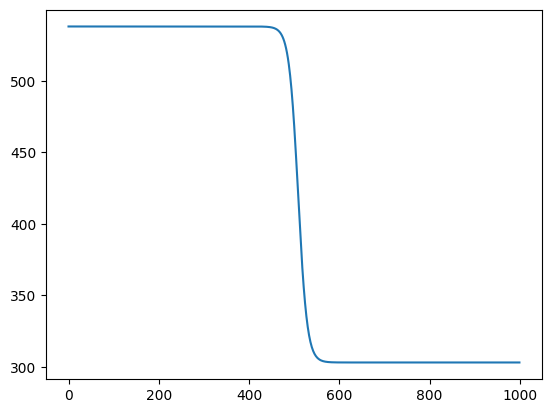

In [35]:
plt.plot(bolts_int(temp[0], A2[0], x, A3[0]))